We can check for the details about the dataset here: [The bAbI Project](https://research.fb.com/downloads/babi/)



For this project, we will be using the Picker Library.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
import pickle
import numpy as np

# Unpickling the Data

In [3]:
with open("/content/drive/MyDrive/1stop.ai/Basic ChatBot/train_qa.txt","rb") as fp:
    train_data = pickle.load(fp) # Obtaining the training data

In [4]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In the data, we can see that there are two sentences in each and also the fullstop has been considered as another token. we need to make sure that this happens. after these two sentences, we have the question and the answer to that question.

In [5]:
with open("/content/drive/MyDrive/1stop.ai/Basic ChatBot/test_qa.txt","rb") as fp:
    test_data = pickle.load(fp)

In [6]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


# Exploring the Data

## Checking the Type of Data

In [7]:
type(train_data)

list

In [8]:
type(test_data)

list

## Checking the Length of Data

In [9]:
len(train_data)

10000

In [10]:
len(test_data)

1000

## Checking first record of Data
In both the training and the testing data, we can see that there is a story, a questiona and an answer.

In [11]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [12]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

We can see the story as:

In [13]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [14]:
' '.join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

The question which we can have for this is:

In [15]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [16]:
' '.join(test_data[0][1])

'Is John in the kitchen ?'

Since the answers to the questions need not be joined, so we have them as:

In [17]:
train_data[0][2]

'no'

In [18]:
test_data[0][2]

'no'

# Setting Up Vocabulary
Here, we will be setting up the vocabulary for all the words in which we will be giving values to all of them as:

In [19]:
# Creating an Empty Set
vocab = set()

In [20]:
# Putting all the Training and testing data into this
all_data = train_data + test_data

In [21]:
all_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In the above output, each tuple has three things - the story in the form of a list, the question in the form of a list and the answer is just a word

In [22]:
type(all_data)

list

In [23]:
len(all_data)

11000

In [24]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [25]:
vocab.add('yes')
vocab.add('no')

After this, we can see that the vocab will have all the workds as:

In [26]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [27]:
type(vocab)

set

In [28]:
len(vocab)

37

So, in total there are 37 unique words. Now, we need one more space to hold zero for the keras pad sequence. So,

In [29]:
vocab_length = len(vocab) + 1

In [30]:
vocab_length

38

Now, we will find out the maximum story length and the maximum question length as:

In [31]:
# For maximum story length
for data in all_data:
    print(data[0]) # With this, we will be able to see all the stories in the data
    print(len(data[0]))
max_story_length = max([len(data[0]) for data in all_data])

Streaming output truncated to the last 5000 lines.
['Mary', 'went', 'to', 'the', 'bathroom', '.', 'Sandra', 'grabbed', 'the', 'football', 'there', '.', 'John', 'journeyed', 'to', 'the', 'office', '.', 'Sandra', 'left', 'the', 'football', '.', 'Mary', 'grabbed', 'the', 'milk', 'there', '.', 'Sandra', 'got', 'the', 'football', 'there', '.', 'John', 'went', 'to', 'the', 'hallway', '.', 'Daniel', 'went', 'to', 'the', 'bedroom', '.']
47
['Mary', 'went', 'to', 'the', 'bathroom', '.', 'Sandra', 'grabbed', 'the', 'football', 'there', '.', 'John', 'journeyed', 'to', 'the', 'office', '.', 'Sandra', 'left', 'the', 'football', '.', 'Mary', 'grabbed', 'the', 'milk', 'there', '.', 'Sandra', 'got', 'the', 'football', 'there', '.', 'John', 'went', 'to', 'the', 'hallway', '.', 'Daniel', 'went', 'to', 'the', 'bedroom', '.', 'Daniel', 'moved', 'to', 'the', 'kitchen', '.', 'Mary', 'discarded', 'the', 'milk', '.']
58
['Sandra', 'went', 'to', 'the', 'bathroom', '.', 'John', 'grabbed', 'the', 'milk', 'there'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
max_story_length

156

In [33]:
# For Maximum Question Length
for data in all_data:
    print(data[1])
    print(len(data[1]))
max_question_length = max([len(data[1]) for data in all_data])

Streaming output truncated to the last 5000 lines.
['Is', 'John', 'in', 'the', 'garden', '?']
6
['Is', 'Daniel', 'in', 'the', 'garden', '?']
6
['Is', 'Daniel', 'in', 'the', 'hallway', '?']
6
['Is', 'Daniel', 'in', 'the', 'hallway', '?']
6
['Is', 'Mary', 'in', 'the', 'bedroom', '?']
6
['Is', 'Mary', 'in', 'the', 'garden', '?']
6
['Is', 'Sandra', 'in', 'the', 'kitchen', '?']
6
['Is', 'Mary', 'in', 'the', 'bedroom', '?']
6
['Is', 'John', 'in', 'the', 'garden', '?']
6
['Is', 'Sandra', 'in', 'the', 'office', '?']
6
['Is', 'Sandra', 'in', 'the', 'garden', '?']
6
['Is', 'Sandra', 'in', 'the', 'kitchen', '?']
6
['Is', 'Sandra', 'in', 'the', 'bedroom', '?']
6
['Is', 'Sandra', 'in', 'the', 'office', '?']
6
['Is', 'Mary', 'in', 'the', 'kitchen', '?']
6
['Is', 'Sandra', 'in', 'the', 'kitchen', '?']
6
['Is', 'Sandra', 'in', 'the', 'kitchen', '?']
6
['Is', 'Daniel', 'in', 'the', 'hallway', '?']
6
['Is', 'Sandra', 'in', 'the', 'garden', '?']
6
['Is', 'Mary', 'in', 'the', 'office', '?']
6
['Is', 'Dani

In [34]:
max_question_length

6

# Vectorizing the Data
In this, we will be converting the data to numerical form.

In [35]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [36]:
# Creating an object of Tokenizer
tokenizer = Tokenizer(filters = []) # because we do not need those filters

In [37]:
tokenizer.fit_on_texts(vocab)

In [38]:
# Obtaining the Word Indices
tokenizer.word_index

{'.': 27,
 '?': 7,
 'apple': 17,
 'back': 22,
 'bathroom': 23,
 'bedroom': 18,
 'daniel': 36,
 'discarded': 30,
 'down': 33,
 'dropped': 24,
 'football': 20,
 'garden': 3,
 'got': 4,
 'grabbed': 32,
 'hallway': 6,
 'in': 37,
 'is': 13,
 'john': 35,
 'journeyed': 5,
 'kitchen': 1,
 'left': 31,
 'mary': 19,
 'milk': 29,
 'moved': 9,
 'no': 15,
 'office': 10,
 'picked': 8,
 'put': 26,
 'sandra': 25,
 'the': 16,
 'there': 28,
 'to': 14,
 'took': 21,
 'travelled': 2,
 'up': 11,
 'went': 12,
 'yes': 34}

Appending the story, question and answer from the training dataset into the separate variable.

In [39]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [40]:
train_story_sequence = tokenizer.texts_to_sequences(train_story_text)

In [41]:
train_question_sequence = tokenizer.texts_to_sequences(train_question_text)

In [42]:
train_answers_sequence = tokenizer.texts_to_sequences(train_answers)

In [43]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [44]:
len(train_story_text)

10000

In [45]:
train_story_sequence

[[19, 9, 14, 16, 23, 27, 25, 5, 14, 16, 18, 27],
 [19,
  9,
  14,
  16,
  23,
  27,
  25,
  5,
  14,
  16,
  18,
  27,
  19,
  12,
  22,
  14,
  16,
  18,
  27,
  36,
  12,
  22,
  14,
  16,
  6,
  27],
 [19,
  9,
  14,
  16,
  23,
  27,
  25,
  5,
  14,
  16,
  18,
  27,
  19,
  12,
  22,
  14,
  16,
  18,
  27,
  36,
  12,
  22,
  14,
  16,
  6,
  27,
  25,
  12,
  14,
  16,
  1,
  27,
  36,
  12,
  22,
  14,
  16,
  23,
  27],
 [19,
  9,
  14,
  16,
  23,
  27,
  25,
  5,
  14,
  16,
  18,
  27,
  19,
  12,
  22,
  14,
  16,
  18,
  27,
  36,
  12,
  22,
  14,
  16,
  6,
  27,
  25,
  12,
  14,
  16,
  1,
  27,
  36,
  12,
  22,
  14,
  16,
  23,
  27,
  36,
  8,
  11,
  16,
  20,
  28,
  27,
  36,
  12,
  14,
  16,
  18,
  27],
 [19,
  9,
  14,
  16,
  23,
  27,
  25,
  5,
  14,
  16,
  18,
  27,
  19,
  12,
  22,
  14,
  16,
  18,
  27,
  36,
  12,
  22,
  14,
  16,
  6,
  27,
  25,
  12,
  14,
  16,
  1,
  27,
  36,
  12,
  22,
  14,
  16,
  23,
  27,
  36,
  8,
  11,
  16,
  20,

In [46]:
len(train_story_sequence)

10000

In [47]:
train_question_text

[['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'office', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'garden', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', '

In [48]:
len(train_question_text)

10000

In [49]:
train_question_sequence

[[13, 25, 37, 16, 6, 7],
 [13, 36, 37, 16, 23, 7],
 [13, 36, 37, 16, 10, 7],
 [13, 36, 37, 16, 18, 7],
 [13, 36, 37, 16, 18, 7],
 [13, 19, 37, 16, 18, 7],
 [13, 25, 37, 16, 10, 7],
 [13, 25, 37, 16, 23, 7],
 [13, 25, 37, 16, 23, 7],
 [13, 19, 37, 16, 1, 7],
 [13, 25, 37, 16, 10, 7],
 [13, 19, 37, 16, 6, 7],
 [13, 19, 37, 16, 6, 7],
 [13, 19, 37, 16, 6, 7],
 [13, 19, 37, 16, 3, 7],
 [13, 25, 37, 16, 10, 7],
 [13, 25, 37, 16, 23, 7],
 [13, 25, 37, 16, 1, 7],
 [13, 19, 37, 16, 18, 7],
 [13, 19, 37, 16, 1, 7],
 [13, 36, 37, 16, 18, 7],
 [13, 25, 37, 16, 23, 7],
 [13, 25, 37, 16, 18, 7],
 [13, 36, 37, 16, 10, 7],
 [13, 36, 37, 16, 1, 7],
 [13, 25, 37, 16, 23, 7],
 [13, 25, 37, 16, 10, 7],
 [13, 35, 37, 16, 10, 7],
 [13, 25, 37, 16, 10, 7],
 [13, 25, 37, 16, 6, 7],
 [13, 35, 37, 16, 23, 7],
 [13, 35, 37, 16, 18, 7],
 [13, 19, 37, 16, 6, 7],
 [13, 35, 37, 16, 18, 7],
 [13, 36, 37, 16, 23, 7],
 [13, 25, 37, 16, 6, 7],
 [13, 19, 37, 16, 1, 7],
 [13, 19, 37, 16, 23, 7],
 [13, 25, 37, 16, 10, 7],

In [50]:
len(train_question_sequence)

10000

In [51]:
train_answers

['no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',


In [52]:
len(train_answers)

10000

In [53]:
train_answers_sequence

[[15],
 [15],
 [15],
 [34],
 [34],
 [34],
 [15],
 [15],
 [15],
 [34],
 [34],
 [34],
 [34],
 [15],
 [34],
 [34],
 [15],
 [34],
 [34],
 [34],
 [15],
 [34],
 [15],
 [15],
 [15],
 [15],
 [34],
 [15],
 [15],
 [15],
 [34],
 [34],
 [15],
 [34],
 [15],
 [15],
 [15],
 [15],
 [34],
 [15],
 [15],
 [34],
 [15],
 [15],
 [15],
 [15],
 [34],
 [34],
 [15],
 [15],
 [34],
 [34],
 [34],
 [34],
 [15],
 [34],
 [15],
 [34],
 [15],
 [34],
 [15],
 [15],
 [15],
 [15],
 [34],
 [34],
 [34],
 [15],
 [34],
 [15],
 [15],
 [34],
 [34],
 [34],
 [15],
 [15],
 [15],
 [15],
 [15],
 [15],
 [34],
 [34],
 [34],
 [34],
 [15],
 [34],
 [34],
 [15],
 [34],
 [15],
 [15],
 [34],
 [15],
 [15],
 [34],
 [34],
 [15],
 [34],
 [34],
 [15],
 [15],
 [15],
 [34],
 [34],
 [15],
 [15],
 [15],
 [34],
 [15],
 [15],
 [34],
 [34],
 [15],
 [15],
 [34],
 [15],
 [34],
 [34],
 [34],
 [15],
 [15],
 [34],
 [34],
 [15],
 [15],
 [15],
 [34],
 [15],
 [15],
 [34],
 [15],
 [34],
 [15],
 [34],
 [34],
 [34],
 [34],
 [34],
 [15],
 [15],
 [15],
 [34],
 [34],

In [54]:
len(train_answers_sequence)

10000

# Functionalising the Vectorization
Here, we will take the input and the data should consist of stories, questions and answers. Then, we have the word index and it takes the dictionary from the tokenizer. The other parameters which we will needs is the length of the longest story and the length of the longest question. We need these parameters for the Pad Sequences Function.

The output of this function is that we need to vectorize the data into the padded sequence. We will first loop through all the entire data and then we will convert the row word into the word index value and then we will append each set to the appropriate output list. Once we convert the word to the number, we will pad  the sequences so that they are of equal length. So, basically, we have to return the tuple.

So, we have:


*   x: It is an empty list which will contain the Stories
*   Xq: It is an empty list which will contain the questions
*   y: It is an empty list which will contain the answers

So, we have to grab the word index for each word in the variables story, question and answer. So, for each word, we will try to obtain the word index for that. We need to obtain this for the respective lists. Then, we will pad the sequences based on the length inorder to make all of them equal.



In [55]:
# Creating the Function
def vectorize_stories(data, 
                      word_index = tokenizer.word_index,
                      max_story_length = max_story_length, 
                      max_question_length = max_question_length):
    # Creating the desired lists
    X = []
    Xq = []
    Y = []
    # Creating the vectors
    for story, question, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return(pad_sequences(X,maxlen=max_story_length),pad_sequences(Xq,maxlen=max_question_length),np.array(Y))

In [56]:
# Vectorising the Training Data
train_input_stories, train_input_questions, train_input_answers = vectorize_stories(train_data)

In [57]:
train_input_stories

array([[ 0,  0,  0, ..., 16, 18, 27],
       [ 0,  0,  0, ..., 16,  6, 27],
       [ 0,  0,  0, ..., 16, 23, 27],
       ...,
       [ 0,  0,  0, ..., 16, 18, 27],
       [ 0,  0,  0, ..., 29, 28, 27],
       [ 0,  0,  0, ..., 17, 28, 27]], dtype=int32)

In [58]:
train_input_questions

array([[13, 25, 37, 16,  6,  7],
       [13, 36, 37, 16, 23,  7],
       [13, 36, 37, 16, 10,  7],
       ...,
       [13, 25, 37, 16,  6,  7],
       [13, 19, 37, 16,  1,  7],
       [13, 19, 37, 16, 18,  7]], dtype=int32)

In [59]:
train_input_answers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
# Vectorising the Testing Data
test_input_stories, test_input_questions, test_input_answers = vectorize_stories(test_data)

In [61]:
test_input_stories

array([[ 0,  0,  0, ..., 16, 18, 27],
       [ 0,  0,  0, ..., 16,  3, 27],
       [ 0,  0,  0, ..., 16,  3, 27],
       ...,
       [ 0,  0,  0, ..., 16, 17, 27],
       [ 0,  0,  0, ..., 16,  3, 27],
       [ 0,  0,  0, ..., 17, 28, 27]], dtype=int32)

In [62]:
test_input_questions

array([[13, 35, 37, 16,  1,  7],
       [13, 35, 37, 16,  1,  7],
       [13, 35, 37, 16,  3,  7],
       ...,
       [13, 19, 37, 16, 18,  7],
       [13, 25, 37, 16,  3,  7],
       [13, 19, 37, 16,  3,  7]], dtype=int32)

In [63]:
test_input_answers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
tokenizer.word_index['yes']

34

In [65]:
tokenizer.word_index['no']

15

# Creating the Model

In [66]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

## Creating placeholders for the input

In [67]:
input_sequence = Input((max_story_length,))
question = Input((max_question_length,))

## Building the Network

In [68]:
# Obtain the input Encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_length, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [69]:
# Obtain the input Encoder m
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_length, output_dim = max_question_length))
input_encoder_c.add(Dropout(0.3))

In [70]:
# Question Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_length, output_dim = 64, input_length = max_question_length))
question_encoder.add(Dropout(0.3))

In [71]:
# Encoding the Sequences
input_encoded_m = input_encoder_m(input_sequence)

input_encoded_c = input_encoder_c(input_sequence)

question_encoded = question_encoder(question)

In [72]:
# We will be using the dot product to match between the encoded queries
match = dot([input_encoded_m, question_encoded], axes=(2,2))

In [73]:
match

<KerasTensor: shape=(None, 156, 6) dtype=float32 (created by layer 'dot')>

In [74]:
match = Activation('softmax')(match)

In [75]:
match

<KerasTensor: shape=(None, 156, 6) dtype=float32 (created by layer 'activation')>

In [76]:
response = add([match, input_encoded_c])

In [77]:
response

<KerasTensor: shape=(None, 156, 6) dtype=float32 (created by layer 'add')>

In [78]:
response = Permute((2,1))(response)

In [79]:
response

<KerasTensor: shape=(None, 6, 156) dtype=float32 (created by layer 'permute')>

In [80]:
answer = concatenate([response, question_encoded])

In [81]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

## Applying LSTM

In [82]:
answer = LSTM(32)(answer)

In [83]:
answer

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'lstm')>

In [84]:
answer = Dropout(0.5)(answer)

In [85]:
answer

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dropout_3')>

In [86]:
answer = Dense(vocab_length)(answer)

In [87]:
answer

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'dense')>

In [88]:
# Obtain the Probability Distribution
answer = Activation('softmax')(answer)

In [89]:
answer

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'activation_1')>

In [90]:
model = Model([input_sequence, question], answer)

In [91]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [92]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

# Training the Mode

In [95]:
# train_input_stories, train_input_questions, train_input_answers = vectorize_stories(train_data)
history = model.fit([train_input_stories, train_input_questions], 
                    train_input_answers, 
                    batch_size = 32, 
                    epochs = 100, 
                    validation_data = ([test_input_stories, test_input_questions], test_input_answers)
                   )

Epoch 1/100
313/313 [==============================] - 3s 10ms/step - loss: 0.2625 - accuracy: 0.8919 - val_loss: 0.3623 - val_accuracy: 0.8450
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.2606 - accuracy: 0.8895 - val_loss: 0.3489 - val_accuracy: 0.8510
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.2547 - accuracy: 0.8926 - val_loss: 0.3633 - val_accuracy: 0.8560
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.2502 - accuracy: 0.8969 - val_loss: 0.3690 - val_accuracy: 0.8540
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.2451 - accuracy: 0.8989 - val_loss: 0.3536 - val_accuracy: 0.8630
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.2501 - accuracy: 0.8990 - val_loss: 0.3398 - val_accuracy: 0.8610
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.2427 - accuracy: 0.9050 - val_loss: 0.3460 - val_accuracy:

In [98]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [99]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Epochs')

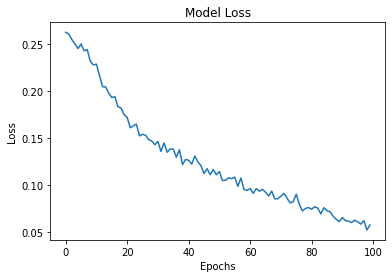

In [107]:
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

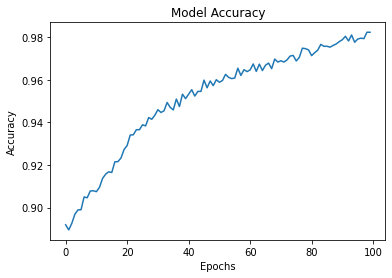

In [106]:
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

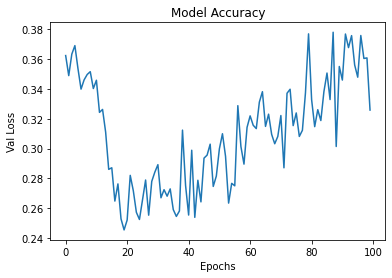

In [105]:
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Val Loss")
plt.xlabel("Epochs")

Text(0, 0.5, 'Val Accuracy')

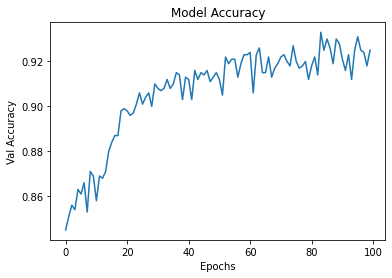

In [104]:
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")

# Saving the Model

In [108]:
model.save("/content/drive/MyDrive/1stop.ai/Basic ChatBot/ChatBot_Model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/1stop.ai/Basic ChatBot/ChatBot_Model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/1stop.ai/Basic ChatBot/ChatBot_Model/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Evaluation on Test Set

In [109]:
model.load_weights("/content/drive/MyDrive/1stop.ai/Basic ChatBot/ChatBot_Model")

In [110]:
# Predicting Results
predict_results = model.predict(([test_input_stories, test_input_questions]))

In [111]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [112]:
# Joining the Sentence
story = ' '.join(word for word in test_data[0][0])

In [113]:
story

'Mary got the milk there . John moved to the bedroom .'

In [114]:
query = ' '.join(word for word in test_data[0][1])

In [115]:
query

'Is John in the kitchen ?'

In [116]:
test_data[0][2]

'no'

In [117]:
# Generating Predictions
val_max = np.argmax(predict_results[0])

for key, val in tokenizer.word_index.items():
    if(val == val_max):
        k = key

print("Predicted Answer is: ", k)
print("Probability of Certainity: ", predict_results[0][val_max])

Predicted Answer is:  no
Probability of Certainity:  0.9999988


# Creating the Story Ourselves and Testing

In [118]:
my_story = "Mary dropped the football . Sandra discarded apple in kitchen"

In [119]:
my_story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [120]:
my_question = "Is apple in the kitchen ?"

In [121]:
my_question.split()

['Is', 'apple', 'in', 'the', 'kitchen', '?']

In [122]:
mydata = [(my_story.split(), my_question.split(), 'yes')]

In [123]:
my_story_vector, my_question_vector, my_answer_vector = vectorize_stories(mydata)

In [124]:
predict_results = model.predict(([my_story_vector, my_question_vector]))

In [125]:
predict_results

array([[3.6078524e-16, 3.6581871e-16, 3.3633111e-16, 3.6367595e-16,
        3.8882711e-16, 3.6010187e-16, 3.7480395e-16, 3.4601473e-16,
        3.7041330e-16, 3.5624477e-16, 3.3381563e-16, 4.1717445e-16,
        3.4951833e-16, 4.1227333e-16, 3.4959967e-16, 9.9996722e-01,
        3.2753017e-16, 4.0876553e-16, 3.9854319e-16, 3.7064372e-16,
        3.8261643e-16, 3.6772008e-16, 3.3664303e-16, 3.5825899e-16,
        3.4743391e-16, 3.7648052e-16, 3.7031161e-16, 3.4898274e-16,
        3.3159585e-16, 3.7217389e-16, 3.4715701e-16, 3.8325038e-16,
        3.9233441e-16, 3.6227327e-16, 3.2760232e-05, 3.7400700e-16,
        3.4459344e-16, 3.8490601e-16]], dtype=float32)

In [126]:
val_max = np.argmax(predict_results[0])

for key, val in tokenizer.word_index.items():
    if(val == val_max):
        k = key

print("Predicted Answer is: ", k)
print("Probability of Certainity is: ", predict_results[0][val_max])

Predicted Answer is:  no
Probability of Certainity is:  0.9999672
